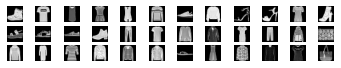

[9 0 0 3 0 2 7 2 5 5]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 110)               86350     
_________________________________________________________________
batch_normalization_18 (Batc (None, 110)               440       
_________________________________________________________________
activation_6 (Activation)    (None, 110)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 60)                6660      
_______________________________

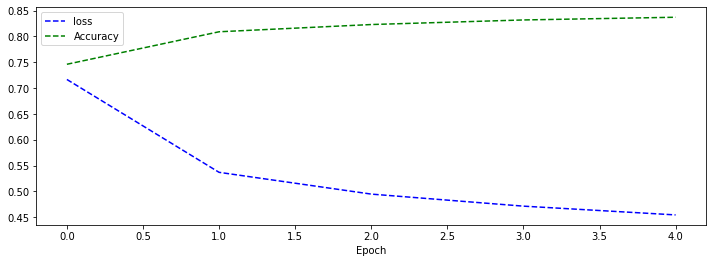

최적화 완료!

===========================test results===========================
313/313 - 1s - loss: 0.6194 - accuracy: 0.8360

 Accuracy: 0.8360


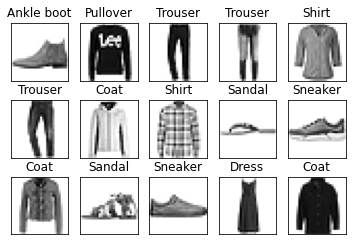

In [15]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

import matplotlib.pylab as plt

plt.figure(figsize=(6, 1)) # 그림(figure)의 크기. (가로, 세로) 인치 단위
for i in range(36):
  plt.subplot(3, 12, i+1)
  plt.imshow(train_images[i], cmap="gray")
  plt.axis("off")
plt.show()

train_images = train_images.reshape((60000, 784))
test_images = test_images.reshape((10000, 784))
train_images = train_images / 255.0 # 0~1 정규화
test_images = test_images / 255.0

print(train_labels[:10])

from tensorflow.keras.utils import to_categorical

# 원 핫 인코딩으로 변경
one_hot_train_labels = to_categorical(train_labels, 10)
one_hot_test_labels = to_categorical(test_labels, 10)

# 앞의 10개 영상에 대한 one hot 인코딩 결과 확인
print(one_hot_train_labels[:10])

#model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(input_dim=784, units=110, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

#학습과정 설정
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습 수행
history = model.fit(train_images, one_hot_train_labels, epochs=5, batch_size=10)

# 모델이 학습되는 과정을 그래프로 표현
plt.figure(figsize=(12, 4))
plt.subplot(1, 1, 1)
plt.plot(history.history['loss'], 'b--', label='loss')
plt.plot(history.history['accuracy'], 'g--', label='Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()
print('최적화 완료!')


# 모델 평가
print("\n===========================test results===========================")
labels = model.predict(test_images)

# .evaluate()함수의 반환값 : 평가된 [0]loss, [1]accuracy
print("\n Accuracy: %.4f" % (model.evaluate(test_images, one_hot_test_labels, verbose=2)[1])) # verbose=2로 설정하여 막대가 나오지 않도록 설정

# 테스트 영상 중 10개만 출력하고 예측결과를 그림 위에 표시해 보자.
fig = plt.figure()
for i in range(15):
  subplot = fig.add_subplot(3, 5, i+1)
  subplot.set_xticks([])
  subplot.set_yticks([])
  subplot.set_title('%s' % class_names[np.argmax(labels[i])])
  subplot.imshow(test_images[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()
print("\n==================================================================")